### 독립표본 t test와 대응표본 t test
* 독립표본 t test
  * 서로 독립인 두 집단 비교
  * 예시 : 수도권과 지방의 집 값
* 대응표본 t test
  * 동일 그룹에 어떤 처리 후 전후 비교
  * 예시 : 대출 규제 시작 전과 후의 집 값

### 순서
* if 표본의 크기가 10~30이면,
  * 정규성 검정
    * 정규성이라면, 등분산 검정
    * 정규성이 아니라면, 순위합 검정
* if 표본의 크기가 30 이상이면,
  * 등분산 검정
    * 등분산이라면, 등분산 가정 독립표본 t test
    * 아니라면, 이분산 가정 독립표본 t test
  
    

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [26]:
house_a = np.random.normal(6, 5, 40)
house_b = np.random.normal(3, 5, 40)

In [27]:
# 수도권
house_a

array([ 3.17901682,  8.88941112, -2.79894442,  9.46760594, 12.78426587,
        2.23565563,  1.84403028,  6.88915889,  6.18554961,  6.87168306,
        6.70260964,  1.14566591,  4.69219237,  5.74711173,  4.1203837 ,
        4.47879571, 13.67892069,  3.38032368,  3.88195951,  6.422635  ,
       11.05888267, 10.68450869, 15.30033011,  0.42961526, -0.62384432,
        8.16292142, 11.47696522, 13.05599812, 10.74193189,  6.48569186,
        3.65370637,  5.07998032,  7.21115373,  2.66062912,  5.72514121,
       12.9560829 ,  4.00498623,  4.41997306, -3.33457913,  2.18723331])

In [28]:
# 지방
house_b

array([-1.70867652, -4.71436739,  4.34613337,  0.88805014,  2.53806958,
       15.47850668, -6.53268433,  4.13305408,  5.99120925,  7.47605066,
        6.969789  ,  3.2115155 ,  2.77210581, -5.2890437 ,  2.90372912,
        8.53955947,  0.3736943 ,  2.48604453,  2.97533881,  3.85565162,
        0.73394746,  2.01366683, -3.49480379,  1.90118433, -0.30410202,
       -4.49226911,  8.84408451,  3.31469975, 11.54326798, -4.53078326,
        2.79080622,  7.16064967,  1.38461838,  2.50778277, -5.34539407,
       -1.75958285, -4.79426469, 10.51939197,  3.86382239,  6.00497314])

In [29]:
tmp1 = pd.concat([pd.DataFrame(['A']*40), pd.DataFrame(house_a.tolist())], axis=1)
tmp2 = pd.concat([pd.DataFrame(['B']*40), pd.DataFrame(house_b.tolist())], axis=1)

df = pd.concat([tmp1, tmp2], axis=0)

In [30]:
df.head(3)

,0,0
0,A,3.179017
1,A,8.889411
2,A,-2.798944


In [31]:
df.tail(3)

,0,0
37,B,10.519392
38,B,3.863822
39,B,6.004973


In [32]:
df.columns = ['grp', 'value']
df.head()

,grp,value
0,A,3.179017
1,A,8.889411
2,A,-2.798944
3,A,9.467606
4,A,12.784266


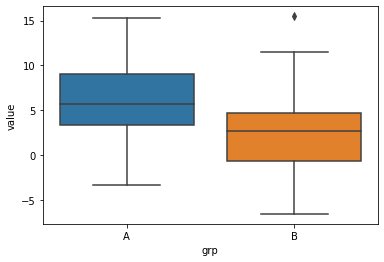

In [33]:
sns.boxplot(x='grp', y='value', data=df)
plt.show()

### 등분산성 검정
* 귀무가설
  * 수도권(grp A), 지방(grp B) 집값의 분산이 같다.
* 대립가설
  * 수도권(grp A), 지방(grp B) 집값의 분산이 다르다.

In [34]:
stats.levene(np.array(df[df['grp'] == 'A']['value']), np.array(df[df['grp'] == 'B']['value']))

LeveneResult(statistic=0.1479286017922795, pvalue=0.7015694395943246)

In [35]:
stats.ttest_ind(np.array(df[df['grp'] == 'A']['value'])
              , np.array(df[df['grp'] == 'B']['value'])
              , equal_var=True)

Ttest_indResult(statistic=3.439558367918385, pvalue=0.0009383977612376575)